## Data Preprocessing :

In [1]:
%pylab inline 
import pandas as pd
import numpy as np

from scipy import stats, integrate
import matplotlib.pyplot as plt
import sklearn









import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

loan_data_df  = pd.read_csv('LoansTrainingSet.csv')

 



#print (set(loan_data_df['Loan Status']));


loan_data_df['flag'] = loan_data_df['Loan Status'].replace(['Charged Off' ,'Fully Paid'], 
                     [1, 0]) ;

    
df1=loan_data_df.rename(columns = {'Loan ID':'loan_id' ,'Customer ID' :'customer_id' , 'Loan Status' :'loan_status'
                                           ,'Current Loan Amount' : 'current_loan_amount' ,'Term' :'term',
                                            'Credit Score':'credit_score' ,
                                            'Years in current job' : 'years_in_current_job',
                                            'Home Ownership' :'home_ownership' ,
                                            'Annual Income' :'annual_income' ,
                                            'Purpose' :'purpose',
                                            'Monthly Debt' :'monthly_debt',
                                            'Years of Credit History' :'years_of_credit_history' ,
                                            
                                            'Months since last delinquent' :'months_since_last_delinquent',
                                            'Number of Open Accounts' : 'number_of_open_accounts' ,
                                            'Number of Credit Problems': 'number_of_credit_problems',
                                            'Current Credit Balance' : 'current_credit_balance' ,
                                            'Maximum Open Credit' :'maximum_open_credit',
                                            'Bankruptcies':'bankruptcies',
                                            'Tax Liens' :'tax_liens',
                                            'flag' :'defaulter_or_not'
        


                                           
                                           })

Populating the interactive namespace from numpy and matplotlib


In [2]:
## Missing Values 

In [3]:
import statsmodels.api as sm

from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn import preprocessing

pd.isnull(df1).any()

 
#df1.drop('loan_id' , inplace=True)
#df1.drop('customer_id', inplace=True)
#df1.drop('loan_status', inplace=True)

df1['annual_income'].fillna((df1['annual_income'].mean()), inplace=True)
df1['months_since_last_delinquent'].fillna((df1['months_since_last_delinquent'].mean()), inplace=True)
df1['credit_score'].fillna((df1['credit_score'].mean()), inplace=True)
df1['bankruptcies'].fillna((df1['bankruptcies'].median()), inplace=True)
df1['tax_liens'].fillna((df1['tax_liens'].median()), inplace=True)
df1['maximum_open_credit'].fillna((0), inplace=True)
#df1.apply(lambda x: x.fillna(x.mean()),axis=0)

#print pd.isnull(df1).any()
#print df1['tax_liens'].median()
#X = df1.ix[:,1:17]


#print list(set(df1['term']))
#print list(set(df1['years_in_current_job']))
#print list(set(df1['home_ownership']))



#df1['term'] =  df1['term'].str.replace(" ", "_") 
#df1['term'] =  df1['term'].str.lower()
#df1['years_in_current_job'] =  df1['years_in_current_job'].str.replace(" ", "_") 
#df1['years_in_current_job'] =  df1['years_in_current_job'].str.lower()

#df1['home_ownership'] =  df1['home_ownership'].str.replace(" ", "_") 
#df1['home_ownership'] =  df1['home_ownership'].str.lower()

df1['term'] =  df1['term'].str.lower()

df1['term'] =  df1['term'].str.replace(" " ,"_")
#print df1['term']

df1 = pd.concat([df1, pd.get_dummies(df1['term']).rename(columns=lambda x:   str(x))], axis=1) 
df1.drop('term',axis =1 , inplace=True)


df1['years_in_current_job'] =  df1['years_in_current_job'].str.lower()

df1['years_in_current_job'] =  df1['years_in_current_job'].str.replace(" " ,"_")

df1 = pd.concat([df1, pd.get_dummies(df1['years_in_current_job']).rename(columns=lambda x:   str(x))], axis=1) 
df1.drop('years_in_current_job',axis =1 , inplace=True)




df1['home_ownership'] =  df1['home_ownership'].str.lower()

df1['home_ownership'] =  df1['home_ownership'].str.replace(" " ,"_")

df1 = pd.concat([df1, pd.get_dummies(df1['home_ownership']).rename(columns=lambda x:   str(x))], axis=1) 
df1.drop('home_ownership',axis =1 , inplace=True)

#ecs = preprocessing.LabelEncoder()



df1['purpose'] =  df1['purpose'].str.lower()

df1['purpose'] =  df1['purpose'].str.replace(" " ,"_")

df1 = pd.concat([df1, pd.get_dummies(df1['purpose']).rename(columns=lambda x:   str(x))], axis=1) 
df1.drop('purpose',axis =1 , inplace=True)
#to convert into numbers

#df1['term'] = ecs.fit_transform(df1['term'] )
#df1['years_in_current_job'] = ecs.fit_transform(df1['years_in_current_job'] )
#df1['home_ownership'] = ecs.fit_transform(df1['home_ownership'] )
#df1['purpose'] = ecs.fit_transform(df1['purpose'] )

#to convert back
 

#train.Sex = le_sex.inverse_transform(train.Sex)


df1.drop('loan_id' , axis =1 , inplace=True)
df1.drop('customer_id',axis =1 , inplace=True)
df1.drop('loan_status',axis =1 , inplace=True)
 
print list(df1.columns)
 
#df1['monthly_debt'] = [x[1:] for x in df1['monthly_debt']]
#df1['monthly_debt'] = df1["monthly_debt"].str.replace(",", "").astype(float)
#df1 = df1[df1['maximum_open_credit'] != '#VALUE!']

#X = df1.ix[:,1:16].values
#print X
#enc = preprocessing.OneHotEncoder().fit(X)
#print enc
#y = df1['defaulter_or_not']

#y = df1["defaulter_or_not"].values
#y = np.ravel(y)



['current_loan_amount', 'credit_score', 'annual_income', 'monthly_debt', 'years_of_credit_history', 'months_since_last_delinquent', 'number_of_open_accounts', 'number_of_credit_problems', 'current_credit_balance', 'maximum_open_credit', 'bankruptcies', 'tax_liens', 'defaulter_or_not', 'long_term', 'short_term', '10+_years', '1_year', '2_years', '3_years', '4_years', '5_years', '6_years', '7_years', '8_years', '9_years', '<_1_year', 'n/a', 'havemortgage', 'home_mortgage', 'own_home', 'rent', 'business_loan', 'buy_a_car', 'buy_house', 'debt_consolidation', 'educational_expenses', 'home_improvements', 'medical_bills', 'other', 'take_a_trip']


In [4]:
features = ['current_loan_amount', 'credit_score', 'annual_income', 'monthly_debt', 'years_of_credit_history',\
            'months_since_last_delinquent', 'number_of_open_accounts', 'number_of_credit_problems',\
            'current_credit_balance', 'maximum_open_credit', 'bankruptcies', 'tax_liens',\
            'long_term', 'short_term', '10+_years', '1_year', '2_years', '3_years', '4_years', '5_years', \
            '6_years', '7_years', '8_years', '9_years', '<_1_year', 'n/a', 'havemortgage', 'home_mortgage',\
            'own_home', 'rent', 'business_loan', 'buy_a_car', 'buy_house', 'debt_consolidation', \
            'educational_expenses', 'home_improvements', 'medical_bills', 'other', 'take_a_trip']

target =  'defaulter_or_not'

X =  df1[list(features)].values
y = df1[target].values


df2 = df1.sample(frac=0.05, replace=True)


X1 =  df2[list(features)].values
y1 = df2[target].values


 

In [5]:
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold

#kf = KFold(len(X), n_folds=5)

#cv = KFold(n=len(X), n_folds=5, shuffle=False,
#                              random_state=None)

train_X, test_X, train_Y, test_Y =  train_test_split(X, y, test_size=.5,\
                                                    random_state=0)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import RidgeClassifier
from sklearn.utils.extmath import density
from sklearn.utils.extmath import density


import logging
import numpy as np
from optparse import OptionParser
import sys
from time import time


from sklearn import cross_validation, metrics  



In [7]:
# Benchmark classifiers
def benchmark(clf, name ):

    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
            
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)
    print()
    t0 = time()
    y_pred = clf.predict(test_X)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)
    
    score = metrics.accuracy_score(test_Y, y_pred)
    print("accuracy:   %0.3f" % score)
    if hasattr(clf, 'coef_'):
        print("dimensionality: %d" % clf.coef_.shape[1])
        print("density: %f" % density(clf.coef_))
    roc = roc_auc_score(test_Y, y_pred)
    print ("AUC Score (Roc): %0.3f" % roc )
    recall = recall_score(test_Y, y_pred)

    print ("recall score :%0.3f " % recall )
    f1 = f1_score(test_Y, y_pred) 
    print ("F1 score :%0.3f"  %  f1 )
    precision = precision_score(test_Y, y_pred)
    print (  "Precision score : %0.3f " % precision )
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr,score , train_time ,test_time , roc ,  recall , f1, precision  
    

Logistic Regression 
________________________________________________________________________________
Training: 
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
train time: 2.937s
()
test time:  0.027s
accuracy:   0.746
dimensionality: 39
density: 1.000000
AUC Score (Roc): 0.598
recall score :0.198 
F1 score :0.329
Precision score : 0.968 
Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=None, solver='lsqr',
        tol=0.01)
train time: 0.102s
()
test time:  0.026s
accuracy:   0.686
dimensionality: 39
density: 1.000000
AUC Score (Roc): 0.500
recall score :0.000 
F1 score :0.000
Preci

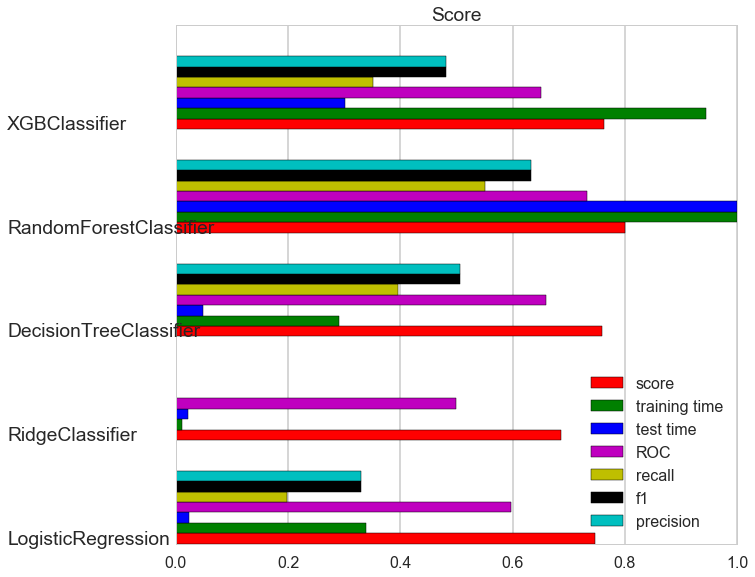

In [16]:

results = []
for clf, name in ( (LogisticRegression() ,"Logistic Regression "),
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (DecisionTreeClassifier(min_samples_split =5 ,max_depth= 10 ),"Decision Tree Classifier"
    ),
        
        (RandomForestClassifier(n_estimators=15), "Random forest"),
                  ( XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=50,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27) ,"XGboost Classifier" )
                 
                 
                 
                 
                 ):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf ,name ))
    
    


indices = np.arange(len(results))
#print (results)

results = [[x[i] for x in results] for i in range(8 )]


clf_names, score, training_time, test_time,  roc ,  recall , f1, precision  = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)


plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .1, label="score", color='r')
plt.barh(indices + .1, training_time, .1, label="training time", color='g')
plt.barh(indices + .2, test_time, .1, label="test time", color='b')
plt.barh(indices + .3, roc , .1, label="ROC", color='m')
plt.barh(indices + .4, recall , .1, label="recall", color='y')
plt.barh(indices + .5, f1 , .1, label="f1", color='k')
plt.barh(indices + .6, f1 , .1, label="precision", color='c')


plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()
    
    



In [9]:
def calculate_fpr_tpr_v2 (clf , name ) :
    
    if name == "XGboost Classifier" :
        clf.fit(train_X, train_Y ,eval_metric='auc' )
    else :
        clf.fit(train_X, train_Y)
    
    
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(test_X)
    else:
        y_score = clf.predict_proba(test_X)[:, 1]
    
    
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes =  2
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test_Y, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])
    
# Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test_Y.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    clf_descr = str(clf).split('(')[0]
    return clf_descr ,fpr , tpr , roc_auc 




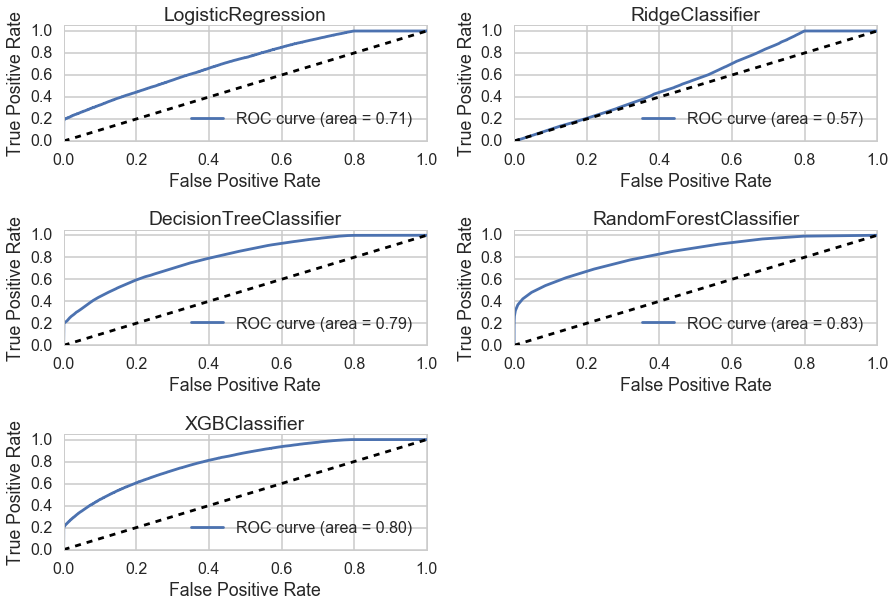

In [15]:

roc_plot = []
for clf, name in ( (LogisticRegression() ,"Logistic Regression "),
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (DecisionTreeClassifier(min_samples_split =5 ,max_depth= 10 ),"Decision Tree Classifier"
    ),
        
        (RandomForestClassifier(n_estimators=15), "Random forest"),
                  ( XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=50,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27) ,"XGboost Classifier" )
                 
                 
                 
                 
                 ):
       roc_plot.append(calculate_fpr_tpr_v2 (clf , name ) )
    

# plot with various axes scales

clf_descr ,fpr , tpr , roc_auc  = roc_plot[0] 
plt.subplot(3,2, 1)
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")
plt.title(clf_descr)
plt.grid(True)
 
    
clf_descr ,fpr , tpr , roc_auc  = roc_plot[1] 
plt.subplot(3,2, 2)
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")
plt.title(clf_descr)
plt.grid(True)
    
    
    
clf_descr ,fpr , tpr , roc_auc  = roc_plot[2] 
plt.subplot(3,2, 3)
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")
plt.title(clf_descr)
plt.grid(True)    
   
clf_descr ,fpr , tpr , roc_auc  = roc_plot[3] 
plt.subplot(3,2, 4)
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")
plt.title(clf_descr)
plt.grid(True)    

clf_descr ,fpr , tpr , roc_auc  = roc_plot[4] 
plt.subplot(3,2, 5)
plt.plot(fpr[0], tpr[0], label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')  
plt.legend(loc="lower right")
plt.title(clf_descr)
plt.grid(True)

plt.tight_layout()
plt.show()



    
    
    


    
    
    
    

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree



from sklearn.learning_curve import learning_curve




def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.
    title : string
        Title for the chart.
    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.
    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.
        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.
        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt




title = "Learning Curves (RidgeClassifier)"


estimator =  RidgeClassifier(tol=1e-2, solver="lsqr")



plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=10, n_jobs = 10)


title = "Learning Curves (Decision Tree Classifier)"


estimator = DecisionTreeClassifier(min_samples_split =5 ,max_depth= 10 )



plot_learning_curve(estimator, title, X, y, ylim=(0.6, 1.01), cv=10, n_jobs = 10)

TypeError: 'list' object is not callable

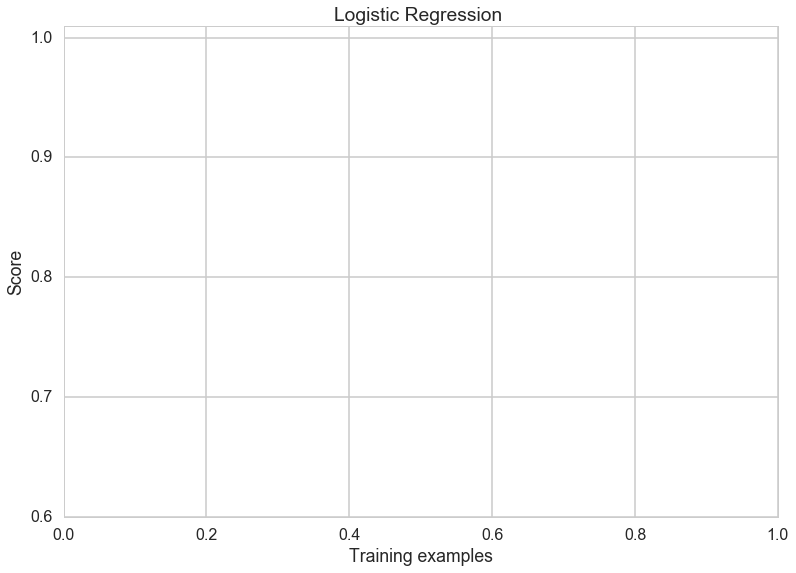

In [25]:
learning_curve = []
for clf, name in ( (LogisticRegression() ,"Logistic Regression "),
        (RidgeClassifier(tol=1e-2, solver="lsqr"), "Ridge Classifier"),
        (DecisionTreeClassifier(min_samples_split =5 ,max_depth= 10 ),"Decision Tree Classifier"
    ),
        
        (RandomForestClassifier(n_estimators=15), "Random forest"),
                  ( XGBClassifier(
                     learning_rate =0.1,
                     n_estimators=50,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                     colsample_bytree=0.8,
                     objective= 'binary:logistic',
                     nthread=4,
                     scale_pos_weight=1,
                     seed=27) ,"XGboost Classifier" )
                 
                 
                 
                 
                 ):
    learning_curve.append(plot_learning_curve(clf , name , X, y, ylim=(0.6, 1.01), cv=10, n_jobs = 10) )

        
        
        